In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np

In [2]:
data=pd.read_excel("bike.xlsx",sheet_name="Data")

In [3]:
data.head()


,Row Labels,1,2,3,4,5,6,7,8,9,...,88,89,90,91,92,93,94,95,96,97
0,1,3,3,1,5,6,2,6,1,1,...,3,3,3,1,10,6,5,1,0,4
1,2,15,17,12,14,7,14,13,2,0,...,6,11,28,14,21,7,9,6,6,7
2,3,1,3,4,4,5,5,10,0,4,...,1,1,1,2,0,0,0,1,0,1
3,4,2,0,0,4,1,1,3,4,7,...,9,5,4,6,4,10,3,4,9,3
4,5,12,7,3,4,9,6,10,1,3,...,0,0,1,1,1,0,0,0,0,0


In [4]:
data.isnull().values.any()  # we see that we have no #NA-s

False

In [5]:
K=range(1,10)
SSE={}
for k in K:
    cluster_bike=KMeans(k)
    data["cluster_bike"]=cluster_bike.fit_predict(data)
    SSE[k]=cluster_bike.inertia_

In [6]:
SSE

{1: 248792.30000000002,
 2: 94309.53571428571,
 3: 70173.1,
 4: 53625.207142857136,
 5: 38611.956521739135,
 6: 31847.36140350877,
 7: 26331.071428571428,
 8: 22427.428571428572,
 9: 19057.616883116883}

In [7]:
import matplotlib.pyplot as plt

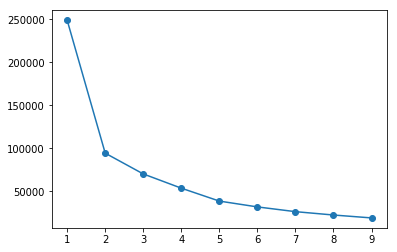

In [8]:
plt.plot(SSE.keys(),SSE.values(),marker="o")   #we can see that the optimal K=2


In [9]:
cluster= KMeans(2)

In [10]:
np.random.seed(24)
data["cluster"]= cluster.fit_predict(data)

In [11]:
data.head()

,Row Labels,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,cluster_bike,cluster
0,1,3,3,1,5,6,2,6,1,1,...,3,1,10,6,5,1,0,4,1,0
1,2,15,17,12,14,7,14,13,2,0,...,28,14,21,7,9,6,6,7,5,0
2,3,1,3,4,4,5,5,10,0,4,...,1,2,0,0,0,1,0,1,1,0
3,4,2,0,0,4,1,1,3,4,7,...,4,6,4,10,3,4,9,3,7,0
4,5,12,7,3,4,9,6,10,1,3,...,1,1,1,0,0,0,0,0,1,0


In [12]:
data.to_excel("cluster.xlsx")